<a href="https://colab.research.google.com/github/tntntnqin/review_crawling/blob/master/%EA%B5%90%EB%B3%B4_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (2,865 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128221 files and di

# 새 섹션

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 15
plt.rc('font', family='NanumBarunGothic', size=15) 
from plotnine import *
import missingno as msno
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2022 베스트 셀러 데이터를 가져와 분야 별로 묶기
kyobo_2022_best_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/kyobo/kyobo_2022_best_data.csv')
kyobo_2022_best_data.drop(columns='Unnamed: 0')
kyobo_2022_best_data_group = kyobo_2022_best_data.groupby('분야').count().sort_values(by=['상품명'], ascending=False)
kyobo_2022_best_data_group.drop(columns='Unnamed: 0')

,순위,상품명,인물,출판사
분야,,,,
소설,17,17,17,17
경제/경영,11,11,11,11
자기계발,8,8,8,8
인문,4,4,4,4
어린이(초등),3,3,3,3
시/에세이,2,2,2,2
정치/사회,2,2,2,2
과학,1,1,1,1
예술/대중문화,1,1,1,1


In [ ]:
# 2022 베스트 셀러 데이터를 가져와 출판사 별로 묶기
kyobo_2022_best_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/kyobo/kyobo_2022_best_data.csv')
kyobo_2022_best_data.drop(columns='Unnamed: 0')
kyobo_2022_best_data_group_m = kyobo_2022_best_data.groupby('출판사').count().sort_values(by=['상품명'], ascending=False)
kyobo_2022_best_data_group_m.drop(columns='Unnamed: 0')
kyobo_2022_best_data_group_m_10 = kyobo_2022_best_data_group_m.head(10)

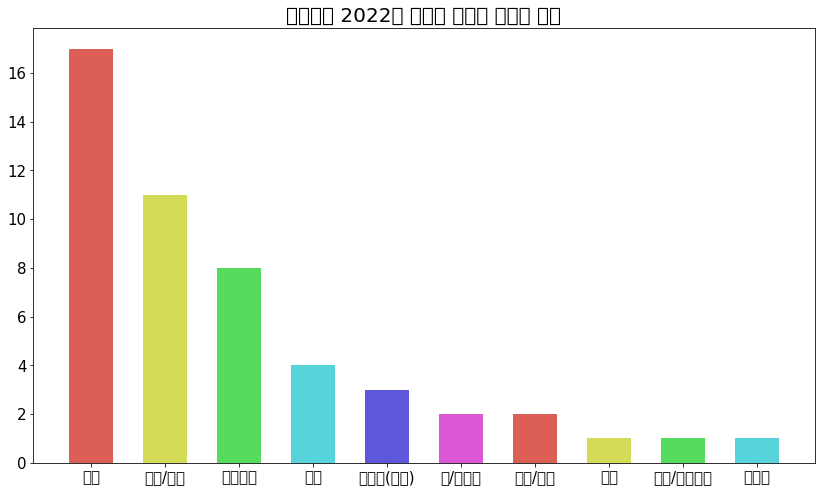

In [ ]:
# 2022년 베스트셀러 장르로 그래프 그리기
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hls')
plt.bar(kyobo_2022_best_data_group.index, kyobo_2022_best_data_group.상품명, color=colors, width=0.6)
plt.title("교보문고 2022년 장르별 베스트 셀러의 권수", fontsize=20)
plt.rc('font', family='NanumBarunGothic') 

plt.show()

In [ ]:
# 상반기 후반기 나눠서 그래프 그릴거 있나 생각해보기(상반기 키워드 후반기 키워드?)
# 탑10이나 탑 5 월별 순위 찾아서 꺾은선 그래프(정리 모르니까 그냥 손으로 모아서 그리기)
# 탑 10은 리뷰 긁어서 워드 클라우드 할거임 그거랑 소설 키워드 긁어서 이것도 갯수 세서 순위나 그런거 그리기


In [ ]:
kyobo_2022_02_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/kyobo/kyobo_2022_02_data.csv')
kyobo_2022_02_data.drop(columns='Unnamed: 0')

,순위,상품명,인물,출판사,분야
0,1,불편한 편의점(40만부 기념 벚꽃 에디션),김호연,나무옆의자,소설
1,2,윤석열 X파일,열린공감TV,열린공감TV,정치/사회
2,3,물고기는 존재하지 않는다,룰루 밀러,곰출판,과학
3,4,그리움은 아무에게나 생기지 않습니다,박근혜,가로세로연구소,정치/사회
4,5,달러구트 꿈 백화점(100만부 기념 합본호: Gift Edition),이미예,팩토리나인,소설
5,6,세븐 테크,김미경 외,웅진지식하우스,경제/경영
6,7,부자 아빠 가난한 아빠 1(20주년 특별 기념판),로버트 기요사키,민음인,경제/경영
7,8,센 강의 이름 모를 여인,기욤 뮈소,밝은세상,소설
8,9,웰씽킹(WEALTHINKING),켈리 최,다산북스,자기계발
9,10,오십에 읽는 논어 (15만 부 기념 리커버 에디션),최종엽,유노북스,인문


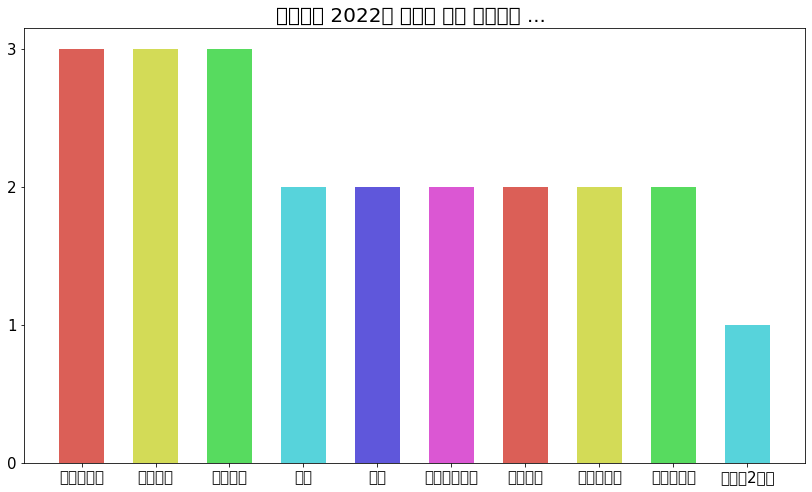

In [ ]:
# 2022년 출판사 그래프 그리기 나중에 한권짜리는 자를까?
plt.figure(figsize=(14, 8))
colors = sns.color_palette('hls')
plt.bar(kyobo_2022_best_data_group_m_10.index, kyobo_2022_best_data_group_m_10.상품명, color=colors, width=0.6)
plt.yticks([0, 1, 2, 3])
plt.title("교보문고 2022년 베스트 셀러 출판사별 ... ", fontsize=20)


plt.show()

In [ ]:
# 베스트 셀러 1위 몇달 가나 평균내기?? 
# 1년간 몇위했나 그래프랑 평균내기??

In [ ]:
# 베스트 셀러 탑 10 일년간 월별 순위 그래프 
# 월 별로 제목만 뽑아서 인덱스를 뽑아야하나?? 
# 이거 중간에 생겼다 사라지는거 생각해봐야할듯???(모아서 해보고 안ㄴ되면 쪼개기)
# 그럼 그냥 베스트 셀러 월간 순위를 책마다 따로 해보든가??